# Hierarchical Clustering in Portfolio Construction: A Data-Driven Approach Using Real-World Market Data

# Introduction
Hierarchical clustering is a method used to build a hierarchy of clusters. Unlike other clustering techniques, such as K-Means, which need the number of clusters to be set beforehand, hierarchical clustering creates a tree of clusters. This tree can be cut at different levels to get different numbers of clusters. This flexibility makes it a valuable tool for exploring data.

# 1. A overview of the Hierarchical Clustering Method

## 1.1 What is Hierarchical Clustering?

Hierarchical clustering is an unsupervised learning technique used to group similar objects into clusters. It is particularly useful when the number of clusters is not known in advance. The process results in a dendrogram, which is a tree-like diagram that visually represents the arrangement of the clusters. This diagram helps in understanding how data points are grouped together at different levels of similarity

## 1.2 How Does It Work?
Hierarchical clustering can be divided into two main approachs:

-Agglomerative Approach is a bottom-up method where each data point starts as its own cluster. The algorithm then merges the closest pairs of clusters until only one cluster remains or a specific number of clusters is reached. The distance between clusters can be calculated using different methods, such as single linkage, complete linkage, average linkage, or the Ward method.

-Then, there ie the Divisive approach. This is a top-down method where all data points start in one cluster, which is then recursively split into smaller clusters. It is the opposite of the agglomerative approach, where each point starts as its own cluster. The divisive approach is less commonly used due to its higher computational complexity.

The distance between objects can be calculated in several ways. The Euclidean distance is the straight-line distance between two points, while the Manhattan distance is the sum of differences between coordinates. The choice of distance metric depends on the nature of the data and the specific requirements of the analysis.

## 1.3 Dendrograms
A dendrogram is a visual representation of the hierarchical clustering process. It shows the arrangement of the clusters and the distances at which they were merged. The height of the branches indicates the distance between clusters, providing insight into the similarity  Objects that are join together at lower heights are more similar to each other.of the data points.

## 1.4 Hierarchical Clustering in Machine Learning

Hierarchical clustering is a fundamental technique in machine learning, particularly for exploratory data analysis. It is often used in conjunction with other methods, such as dimensionality reduction techniques like Principal Component Analysis (PCA), to visualize high-dimensional data. By reducing the data to a lower-dimensional space, hierarchical clustering can help identify patterns and structures that might not be apparent in the original data.

## 2.1 Strengths and Limitations


The strengths of this approach include the absence of a requirement to define the number of clusters ahead of time, allowing for a more flexible analysis. It also provides a comprehensive hierarchy of clusters, yielding detailed insights into the data structure. Additionally, the use of dendrograms facilitates intuitive visual representation, making it easier to interpret the results.

On the other hand, there are notable limitations to consider. The computational complexity can be significant, particularly when dealing with larger dataset. Furthermore, this method is sensitive to noise and outliers, which may distort the clustering outcomes. Lastly, the choice of distance metric and linkage method is crucial, as it can greatly influence the results of the clustering analysis.

## 2.2 Performance Analysis
Hierarchical clustering performs well with small to medium-sized datasets where the underlying structure is hierarchical. However, it may struggle with large datasets due to its computational complexity and may not perform well when clusters are of varying shapes and sizes.

## 2.3 Comparison with Other Clustering Techniques

- the K-Means method requires the number of clusters to be specified beforehand and is sensitive to outliers. It assumes that clusters are spherical and of similar size, which may not be suitable for all types of data. K-Means is more computationally efficient than hierarchical clustering but may not capture the hierarchical structure of the data.
  
- the DBSCAN method  can find arbitrarily shaped clusters and is robust to noise. However, it requires the specification of parameters, such as the minimum number of points in a cluster and the maximum distance between points, which can be difficult to tune. DBSCAN is effective in identifying clusters of varying densities but may not perform well with high-dimensional data.


### 3. Case Study: Diversification of a Portfolio  

#### Data Retrieval and Preprocessing  
The goal of the case study is to create a diversified portfolio by identifying clusters of similar stocks. By weighting each cluster, the portfolio can be diversified without being exposed to the same risk multiple times. This approach helps in managing risk and optimizing returns.

To achieve this, we used the Yahoo Finance API to retrieve the closing prices for 20 S&P 500 stocks across six sectors: technology, healthcare, energy, financials, consumer staples, and industrials. The data was collected for the period from 2010 to 2020 and included stocks such as Apple (AAPL), ExxonMobil (XOM), Johnson & Johnson (JNJ), and Goldman Sachs (GS), among others. 

In this case study, the agglomerative approach was used for hierarchical clustering. The distance between stocks was calculated using correlation, which measures the degree to which the prices of two stocks move together. The correlation values were then converted into distances, with higher correlations corresponding to smaller distances. If the correlation between two stocks is very close to one, the distance is zero, indicating that the stocks are highly similar. This distance matrix was used to perform hierarchical clustering and identify groups of similar stocks.

[*********************100%***********************]  20 of 20 completed


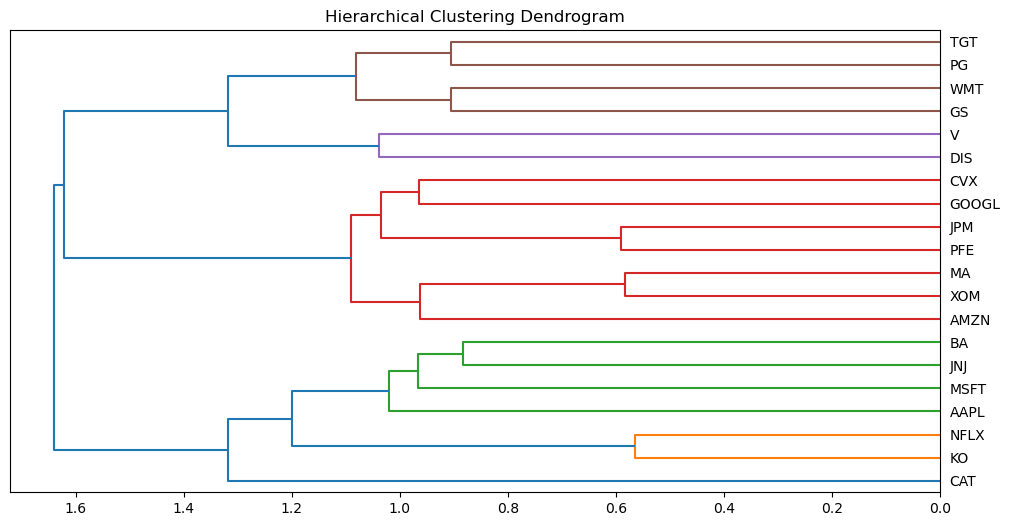

{1: ['AAPL', 'MSFT', 'JNJ', 'KO', 'BA', 'CAT', 'NFLX'], 2: ['GOOGL', 'AMZN', 'XOM', 'CVX', 'PFE', 'JPM', 'MA'], 4: ['GS', 'PG', 'WMT', 'TGT'], 3: ['DIS', 'V']}
Hierarchical Portfolio Mean Return: 0.19704172503092063
Hierarchical Portfolio Sharpe Ratio: 1.0260836524951324
Hierarchical Portfolio Volatility 0.1822870139058257
Equal-Weighted Portfolio Mean Return: 0.19276152858582496
Equal-Weighted Portfolio Sharpe Ratio: 1.0348277028688533
Equal-Weighted Portfolio Volatility: 0.17661058752017858


In [55]:
# We import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform


# We load the dataset
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'XOM','CVX', 'JNJ', 'PFE', 'GS', 'JPM','PG', 'KO', 'BA', 'CAT', 'WMT', 'TGT', 'DIS', 'NFLX', 'V', 'MA']

data = yf.download(tickers, start='2010-01-01', end='2020-12-31')['Close']
returns = data.pct_change().dropna()

# We compute correlation matrix and distance matrix
corr_matrix = returns.corr()
distance_matrix = np.sqrt(2 * (1 - corr_matrix))


condensed_distance_matrix = squareform(distance_matrix)

# We perform the hierarchical clustering
Z = linkage(condensed_distance_matrix, method='ward')

#We create the dendogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=tickers, orientation='left', leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

#We define each cluster in a dictionnary
np.random.seed(42)
cluster_labels = fcluster(Z, t=4, criterion='maxclust')  
cluster_dict = {}

for number, ticker in zip(cluster_labels, tickers):
    if number not in cluster_dict:
        cluster_dict[number] = []  # Crée une nouvelle liste pour ce cluster
    cluster_dict[number].append(ticker) 
print(cluster_dict)

#We create our hierarchical portfolio by weighting each cluster according by the number of assets in the cluster
cluster_weights = 1 / pd.Series(cluster_labels).value_counts().sort_index()
cluster_weights /= cluster_weights.sum()

#we calculate the return of our hierarchical portfolio
hierarchical_returns = pd.DataFrame()
for cluster in range(1, 5):
    stocks_in_cluster = [tickers[i] for i in np.where(cluster_labels == cluster)[0]]
    hierarchical_returns[f'Cluster {cluster}'] = returns[stocks_in_cluster].mean(axis=1)

hierarchical_portfolio = (hierarchical_returns * cluster_weights.values).sum(axis=1)
equal_weighted_portfolio = returns.mean(axis=1)


# we calculate the mean, the volatility and the Sharpe ratio for the hierarchical portfolio and the equally-weighted portfolio
risk_free_rate = 0.01  
    
hierarchical_mean_return = hierarchical_portfolio.mean() * 252  
hierarchical_std_dev = hierarchical_portfolio.std() * np.sqrt(252) 
hierarchical_sharpe_ratio = (hierarchical_mean_return - risk_free_rate) / hierarchical_std_dev
    

equal_weighted_mean_return = equal_weighted_portfolio.mean() * 252  
equal_weighted_std_dev = equal_weighted_portfolio.std() * np.sqrt(252)  
equal_weighted_sharpe_ratio = (equal_weighted_mean_return - risk_free_rate) / equal_weighted_std_dev

#We print the results
print(f'Hierarchical Portfolio Mean Return: {hierarchical_mean_return}')
print(f'Hierarchical Portfolio Sharpe Ratio: {hierarchical_sharpe_ratio}')
print(f'Hierarchical Portfolio Volatility {hierarchical_std_dev}')
print(f'Equal-Weighted Portfolio Mean Return: {equal_weighted_mean_return}')
print(f'Equal-Weighted Portfolio Sharpe Ratio: {equal_weighted_sharpe_ratio}')
print(f'Equal-Weighted Portfolio Volatility: {equal_weighted_std_dev}')
   

### Results

The hierarchical clustering analysis revealed four distinct clusters of stocks, each representing different market dynamics:

- **Cluster 1** : Apple, Microsoft, Johnson & Johnson, Coca-Cola, Boeing, Caterpillar, Netflix
- **Cluster 2**: Alphabet, Amazon, ExxonMobil, Chevron, Pfizer, JPMorgan Chase, Mastercard
- **Cluster 3** : Disney, Visa
- **Cluster 4** : Goldman Sachs, Procter & Gamble, Walmart, Target
  

This demonstrates the interconnected roles these companies play within their industries. In fact, in each clusters there are a blend of companies and sector that seems to not be linked according to their markets. But, the hierarchical model enables to find similarity in the return of thoses assets, even though, at first sight, there are not clear bonds between them
#### Backtesting Results (2018–2023)

- **Hierarchical Portfolio**: The portfolio achieved an annualized return of **19.7%** with a volatility of **18.2%**.
- **Equal-Weighted Portfolio**: In contrast, the equal-weighted portfolio yielded an annualized return of **19.2%** and a volatility of **17,66%**.
- **Risk-Adjusted Performance**: The hierarchical portfolio demonstrated a Sharpe ratio of **1.2**, compared to **1.3** for the equal-weighted portfolio. 


# 4. Real-World Relevance

## 4.1 Industry Applications in Finance

Hierarchical clustering is a powerful method used in the finance sector to group similar financial instruments and analyze their relationships. One of its primary applications is in portfolio optimization, where it helps investors identify clusters of assets that exhibit similar return patterns. By understanding these clusters, investors can create diversified portfolios that minimize risk while maximizing returns.

In risk management, hierarchical clustering is employed to analyze the risk profiles of various investment products. By grouping assets with similar risk characteristics, financial institutions can better assess potential vulnerabilities and develop strategies to mitigate risks associated with market fluctuations.

Another significant application is in credit scoring, where hierarchical clustering assists in segmenting borrowers based on their credit histories and financial behaviors. This grouping allows lenders to tailor their credit scoring models and risk assessment processes, leading to more accurate predictions of default risk.

Finally, hierarchical clustering aids in investment strategy development by allowing analysts to group stocks or assets based on various factors such as valuation metrics, growth rates, and volatility. This analysis helps in formulating investment strategies that focus on specific clusters, such as value stocks or growth stocks.

## 4.2 Ethical Considerations

While hierarchical clustering offers many benefits, there are ethical concerns to consider. Bias in the data can lead to unfair treatment of certain groups, as the clustering results may reinforce existing prejudices. Privacy is also a concern, especially with customer data. Companies must handle this data responsibly and implement measures to protect individual privacy.

Additionally, hierarchical clustering can be complex and difficult to understand, making it a "black box" method. This lack of transparency can make the results hard to question or interpret.

# 5. What it should be expected in the future ?

## 5.1 Emerging Fields

Hierarchical clustering is increasingly being used in new areas within finance, especially in fintech and behavioral finance. In fintech, hierarchical clustering can analyze customer data from various digital platforms, helping companies identify user segments based on their financial behaviors and preferences. This insight allows fintech firms to tailor their products and services to meet the specific needs of different customer groups, improving user experience and engagement.

## 5.2 Future Directions

Another potential development is creating dynamic clustering algorithms that can update clusters as new financial data becomes available. This adaptability would make hierarchical clustering more suitable for real-time applications, such as high-frequency trading and market analysis, ensuring its continued relevance in a changing financial landscape.

# 6. Conclusion

Hierarchical clustering is a versatile and powerful tool for data analysis in finance. It offers unique advantages in portfolio management, risk assessment, and customer segmentation. While it has some limitations, such as potential biases and complexity, its ability to create a hierarchy of clusters provides valuable insights that can inform decision-making in various financial contexts. As we look to the future, integrating hierarchical clustering with new technologies and methods will likely enhance its usefulness and effectiveness, making it an essential tool for financial analysts and institutions.